In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame({
    'x': [0.1, 0.3, 0.6, 0.7],
    'y':[0.2, 0.25, 0.4, 0.7],
})
df

,x,y
0,0.1,0.20
1,0.3,0.25
2,0.6,0.40
3,0.7,0.70


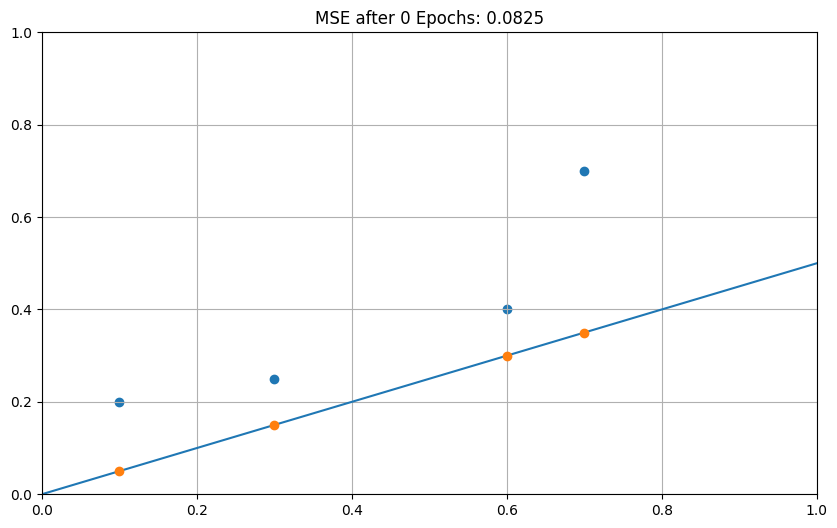

In [3]:
init_w11 = 0.5
init_b11 = 0
init_predictions = [0.05, 0.15, 0.30, 0.35]

fig, ax = plt.subplots(figsize=(10, 6))
ax.axline((0, init_b11), slope=init_w11)
ax.scatter(df['x'], df['y'])
ax.scatter(df['x'], init_predictions, zorder=3)
ax.set_title("MSE after 0 Epochs: {}".format(0.0825))
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.grid()
plt.show()

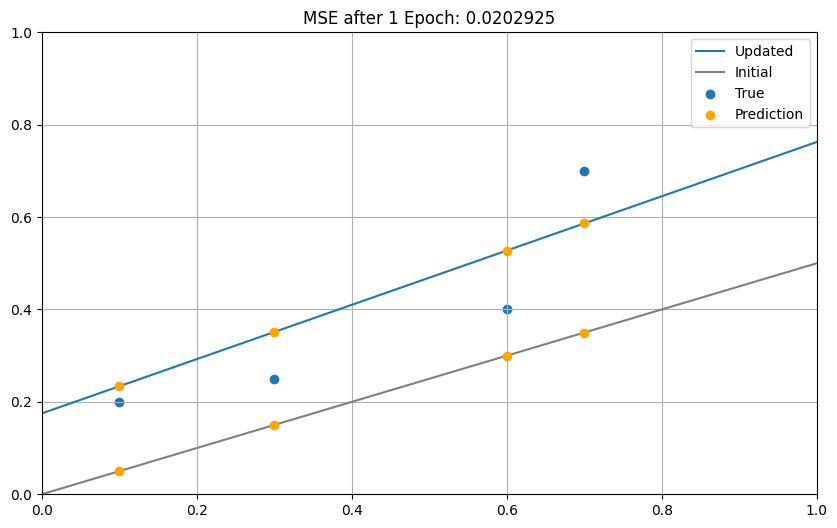

In [4]:
w11 = 0.5875
b11 = 0.175
second_predictions = [0.23375, 0.35125, 0.5275, 0.58625]

fig, ax = plt.subplots(figsize=(10, 6))
ax.axline((0, b11), slope=w11, label="Updated")
ax.axline((0, init_b11), slope=init_w11, c='grey', label='Initial')
ax.scatter(df['x'], df['y'], label="True")
ax.scatter(df['x'], second_predictions, zorder=3, c='orange', label="Prediction")
ax.scatter(df['x'], init_predictions, zorder=3, c='orange')
ax.set_title("MSE after 1 Epoch: {}".format(0.0202925))
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.legend()
ax.grid()
plt.show()

In [12]:
class SinirHucresi():
  def __init__(self, X, y):
    self.agirlik1 = np.random.rand()
    self.agirlik2 = np.random.rand()
    self.bias = np.random.rand()

    self.tahminler = np.zeros(len(X))
    self.ogrenme_orani = 0.1

    self.X = X
    self.y = y

  def tahmin_et(self, X):
    return self.agirlik1 * X + self.agirlik2 * (X ** 2) + self.bias
    # f(x) = ax + bx^2 + c

  def hata_hesapla(self):
    # MSE Hesaplama
    return np.mean((self.y - self.tahminler) ** 2)
    # MSE = 1/n * sum((y - y_pred)^2)

  def parametreleri_guncelle(self): # geriye yayılım ve gradyan iniş algoritması (backpropagation and gradient descent)
    for i in range(len(self.X)):
      # gradyan hesaplama
      gradyan_agirlik1 = -2 * self.X[i] * (self.y[i] - self.tahminler[i])
      gradyan_agirlik2 = -2 * (self.X[i] ** 2) * (self.y[i] - self.tahminler[i])
      gradyan_bias = -2 * (self.y[i] - self.tahminler[i])
      # gradyan = -2 * x * (y - y_pred) yani MSE fonksiyonunun türevi

      # agirlik ve bias guncelleme
      self.agirlik1 -= self.ogrenme_orani * gradyan_agirlik1
      self.agirlik2 -= self.ogrenme_orani * gradyan_agirlik2
      self.bias -= self.ogrenme_orani * gradyan_bias

  def egit(self, epoch):
    for _ in range(epoch):
      for i in range(len(self.X)):
        self.tahminler[i] = self.tahmin_et(self.X[i])
      self.parametreleri_guncelle()
      print(f"Epoch: {_} Hata: {self.hata_hesapla()}")

  def plot_model(self, epoch, plot_num, nrows, ncols):
      line = [self.agirlik1 * i + self.agirlik2 * (i * i) + self.bias for i in np.linspace(0, 1, 100)]
      ax = plt.subplot(nrows, ncols, plot_num + 1)
      ax.scatter(np.linspace(0, 1, 100), line, zorder = 3, s = 1 / 2, c = 'red', label = "Model")
      ax.scatter(self.X, self.y, s = 50, c = 'green', label = "True")
      ax.scatter(self.X, self.tahminler, zorder = 3, s = 50, c = 'orange', label = "Tahmin")
      ax.set_title("Epoch: {}, Error: {:.5f}".format(epoch, self.hata_hesapla()))
      ax.set_xlim([0, 1])
      ax.set_ylim([0, 1])
      ax.grid()
      ax.legend(loc = "upper left")

Epoch: 0 Hata: 0.554244167636092
Epoch: 1 Hata: 0.008284987167370255
Epoch: 2 Hata: 0.007923287375840724
Epoch: 3 Hata: 0.007613653342904715
Epoch: 4 Hata: 0.007340009182280173


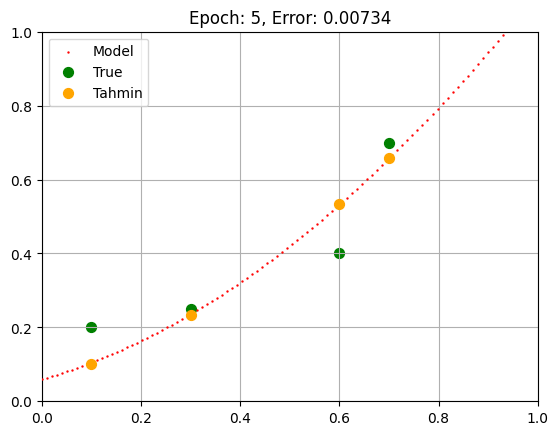

In [29]:
hucre = SinirHucresi(df['x'], df['y'])
hucre.egit(50000)
hucre.plot_model(5, 0, 1, 1)

In [30]:
hucre.agirlik1, hucre.agirlik2, hucre.bias

(0.3910349730310442, 0.6594435776731177, 0.05924802669990848)